In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

from molmap.feature.sequence.aas.global_feature import Extraction
from molmap import AggMolMap, show

RDKit WARNING: [12:31:08] Enabling RDKit 2019.09.2 jupyter extensions


### https://academic.oup.com/bioinformatics/article/29/7/960/253928
![img](./feature_type.png)

In [2]:
ps0 = 'MLMPKKNRIAIHELLFKEGVMVAKKDVHMPKHPELAD'
ps1 = 'MQSLKSMLMPKKNRIAIHELLFKNVPNLHVMKA'
ps2 = 'KEGVMVAKKDVHMPKHPELADKNVPNLHVMKAMQSLK'
ps3 = 'MQSLKSMLMPKKNRIAIHVPNLHVMKANLHVMK'
ps4 = 'KEKKDVHMPKHPELADKNVPNLHVMKAMQSLK'
ps5 = 'MPKHPELADKNMQSLKSMLMAKKDVHVIANLHV'
ps_list = [ps0, ps1, ps2, ps3, ps4, ps5]

In [3]:
E = Extraction(feature_dict = {'AAC12':{}, 
                                   'Autocorr':{}, 
                                   'CTD':{}, 
                                   'QSO':{"maxlag":30, "weight":0.1},
                                   'PAAC':{'lamda':30, "weight":0.05}})

In [4]:
E.colormaps.keys()

dict_keys(['AAC12', 'Autocorr', 'CTD', 'QSO', 'PAAC'])

In [5]:
E._transform_ps(ps1).shape

(1947,)

In [6]:
# extract features
X = E.batch_transform(ps_list)

100%|##########| 6/6 [00:00<00:00, 139.15it/s]


In [7]:
dfx = pd.DataFrame(X, columns = E.bitsinfo.IDs)

In [12]:
dfx

IDs,A,R,N,D,C,E,Q,G,H,I,...,PAAC71,PAAC72,PAAC73,PAAC74,PAAC75,PAAC76,PAAC77,PAAC78,PAAC79,PAAC80
0,8.108,2.703,2.703,5.405,0.0,8.108,0.000,2.703,8.108,5.405,...,2.784,2.588,-0.555,-0.275,-1.827,0.255,-0.285,1.827,-2.377,-1.444
1,6.061,3.030,9.091,0.000,0.0,3.030,3.030,0.000,6.061,6.061,...,-0.366,-0.153,3.251,3.093,-4.080,-1.964,1.440,1.099,2.808,1.139
2,8.108,0.000,5.405,5.405,0.0,5.405,2.703,2.703,8.108,0.000,...,-0.426,-1.598,-0.431,-0.115,-1.092,-0.115,1.931,2.815,0.857,1.660
3,6.061,3.030,9.091,0.000,0.0,0.000,3.030,0.000,9.091,6.061,...,-1.791,-1.728,-0.808,-0.264,4.173,3.899,-4.004,-2.203,0.771,1.300
4,6.250,0.000,6.250,6.250,0.0,6.250,3.125,0.000,9.375,0.000,...,-1.670,-1.972,-0.246,1.052,2.132,2.285,2.382,2.554,-0.986,2.910
5,9.091,0.000,6.061,6.061,0.0,3.030,3.030,0.000,9.091,3.030,...,1.546,0.182,0.852,-0.199,-1.193,-1.580,-0.307,-0.540,-1.977,-1.330


In [8]:
mp = AggMolMap(dfx)

2021-07-21 12:31:28,202 - INFO - [bidd-molmap] - Calculating distance ...
2021-07-21 12:31:28,426 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 1947/1947 [00:01<00:00, 1275.43it/s]


In [9]:
mp.fit(cluster_channels=5, var_thr = 1e-2)

2021-07-21 12:32:59,154 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Wed Jul 21 12:32:59 2021 Finding Nearest Neighbors
Wed Jul 21 12:32:59 2021 Finished Nearest Neighbor Search
Wed Jul 21 12:33:00 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jul 21 12:33:03 2021 Finished embedding
2021-07-21 12:33:03,466 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-07-21 12:33:04,272 - INFO - [bidd-molmap] - Finished


In [10]:
mp.plot_scatter()

2021-07-21 12:33:04,279 - INFO - [bidd-molmap] - generate file: ./feature points_907_correlation_umap_scatter
2021-07-21 12:33:04,330 - INFO - [bidd-molmap] - save html file to ./feature points_907_correlation_umap_scatter


In [11]:
mp.plot_grid()

2021-07-21 12:33:04,433 - INFO - [bidd-molmap] - generate file: ./feature points_907_correlation_umap_mp
2021-07-21 12:33:04,457 - INFO - [bidd-molmap] - save html file to ./feature points_907_correlation_umap_mp


In [12]:
colormaps = {'AAC12': '#00ff1b',
             'AAC3': '#00ff86', 
             'Autocorr': '#bfff00',
             'CTD': '#ffd500',
             'QSO': '#ff0082',
             'PAAC': '#0033ff',
             'NaN': '#000000'}

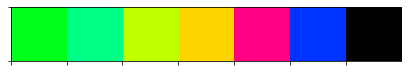

In [13]:
import seaborn as sns
sns.palplot(colormaps.values())


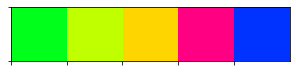

In [14]:
sns.palplot(E.colormaps.values())

In [ ]:
X = mp.batch_transform(dfx.values)

In [ ]:
show.imshow_wrap(X[0],x_max=1, vmin=-2, color_list = mp.colormaps.values(), mode='dark')

In [ ]:
w,h,c = X[0].shape

In [ ]:
cmaps = [sns.light_palette(color, n_colors =  50, reverse=False) for color in mp.colormaps.values()]

In [ ]:
[sns.palplot(cmap) for cmap in cmaps]

In [ ]:
x = X[0]

In [ ]:
for i in range(c):
    data = x[:,:,i]
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(data, cmap = cmaps[i],  vmin = 0, vmax = 1,  
                yticklabels=False, xticklabels=False, cbar=False, ax=ax, ) # linewidths=0.005, linecolor = '0.9

In [ ]:
show.imshow_wrap(X[0],x_max=1, color_list = mp.colormaps.values())

In [ ]:
show.imshow_wrap(X[1],x_max=1, color_list = mp.colormaps.values())

In [ ]:
mp.df_embedding.groupby('Channels').size()

In [ ]:
show.imshow_wrap(X[3],x_max=1, color_list = mp.colormaps.values())